# Importing Important Packages


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
import warnings


# Loading the Important Packages

In [34]:
# Loading the data set from the .csv file

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 
                'slope', 'ca', 'thal', 'target']

Data = pd.read_csv("/Users/kanishka.arora/Downloads/heart_disease_uci 2.csv", names=column_names, header=0)

| Variable  | Description  |
|-----------|--------------|
| age       | Age of the patient in years |
| sex       | Gender of the patient (0 = male, 1 = female) |
| cp        | Chest pain type: 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic |
| trestbps  | Resting blood pressure in mm Hg |
| chol      | Serum cholesterol in mg/dl |
| fbs       | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| restecg   | Resting electrocardiographic results: 0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy |
| thalach   | Maximum heart rate achieved during a stress test |
| exang     | Exercise-induced angina (1 = yes, 0 = no) |
| oldpeak   | ST depression induced by exercise relative to rest |
| slope     | Slope of the peak exercise ST segment: 0: Upsloping, 1: Flat, 2: Downsloping |
| ca        | Number of major vessels (0-4) colored by fluoroscopy |
| thal      | Thalium stress test result: 0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described |
| target(num)    | Heart disease status (0 = no disease, 1 = presence of disease) |


In [35]:
print(Data['target'])

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: target, Length: 920, dtype: int64


# Converting Columns into 'Numerical' or 'Categorical' type

In [36]:
# Manually convert specific columns to categorical based on domain knowledge

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for column in categorical_columns:
    Data[column] = Data[column].astype('category')

# Convert other columns to numeric, coercing errors to NaN
    
numerical_columns = [col for col in Data.columns if col not in categorical_columns]
for column in numerical_columns:
    Data[column] = pd.to_numeric(Data[column], errors='coerce')
    Data[column] = Data[column].astype('float')

In [37]:
# We print this to see and confirm that the first row of Data is filled with non-numeric values, and hence delete it

print(Data.head(5))

    age     sex               cp  trestbps   chol    fbs         restecg  \
0  63.0    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1  67.0    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2  67.0    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3  37.0    Male      non-anginal     130.0  250.0  False          normal   
4  41.0  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal target  
0   150.0  False      2.3  downsloping  0.0       fixed defect      0  
1   108.0   True      1.5         flat  3.0             normal      2  
2   129.0   True      2.6         flat  2.0  reversable defect      1  
3   187.0  False      3.5  downsloping  0.0             normal      0  
4   172.0  False      1.4    upsloping  0.0             normal      0  


In [38]:
# We delete the first row for the reasons mentioned in the previous cell

data = Data.drop(0).reset_index(drop=True)
print(data.head())

    age     sex               cp  trestbps   chol    fbs         restecg  \
0  67.0    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
1  67.0    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
2  37.0    Male      non-anginal     130.0  250.0  False          normal   
3  41.0  Female  atypical angina     130.0  204.0  False  lv hypertrophy   
4  56.0    Male  atypical angina     120.0  236.0  False          normal   

   thalch  exang  oldpeak        slope   ca               thal target  
0   108.0   True      1.5         flat  3.0             normal      2  
1   129.0   True      2.6         flat  2.0  reversable defect      1  
2   187.0  False      3.5  downsloping  0.0             normal      0  
3   172.0  False      1.4    upsloping  0.0             normal      0  
4   178.0  False      0.8    upsloping  0.0             normal      0  


# Exploratory Data Analysis

In this section we explore the dataset to find patterns and important information.

In [39]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_cols = [col for col in data.columns if col not in categorical_cols and col != 'target']  # Assuming 'target' is your label column

### 1.  Histograms for Numerical Columns
*  ##### Numerical Column Histogram

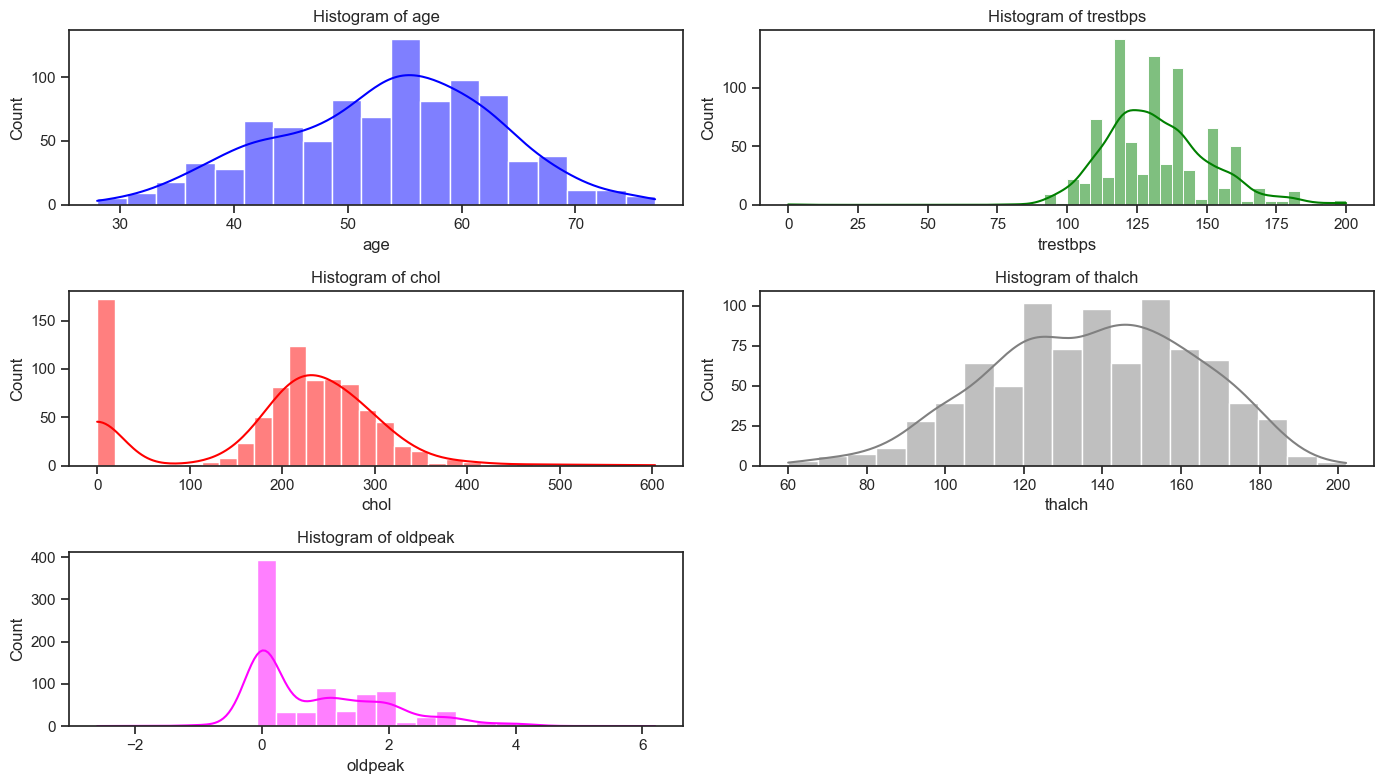

In [40]:
# Assuming numeric_cols contains the list of numeric column names
numeric_cols = data.select_dtypes(include=['number']).columns

# Define a list of colors for the histograms
colors = ['blue', 'green', 'red', 'grey', 'magenta']
plt.figure(figsize=(14, 8))
num_numeric = len(numeric_cols)
rows_numeric = num_numeric // 2 + num_numeric % 2

for i, col in enumerate(numeric_cols):
    plt.subplot(rows_numeric, 2, i + 1)
    color = colors[i % len(colors)]  # Cycle through the colors list
    sns.histplot(data[col], kde=True, color=color)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

* ##### Categorical Column HIstogram

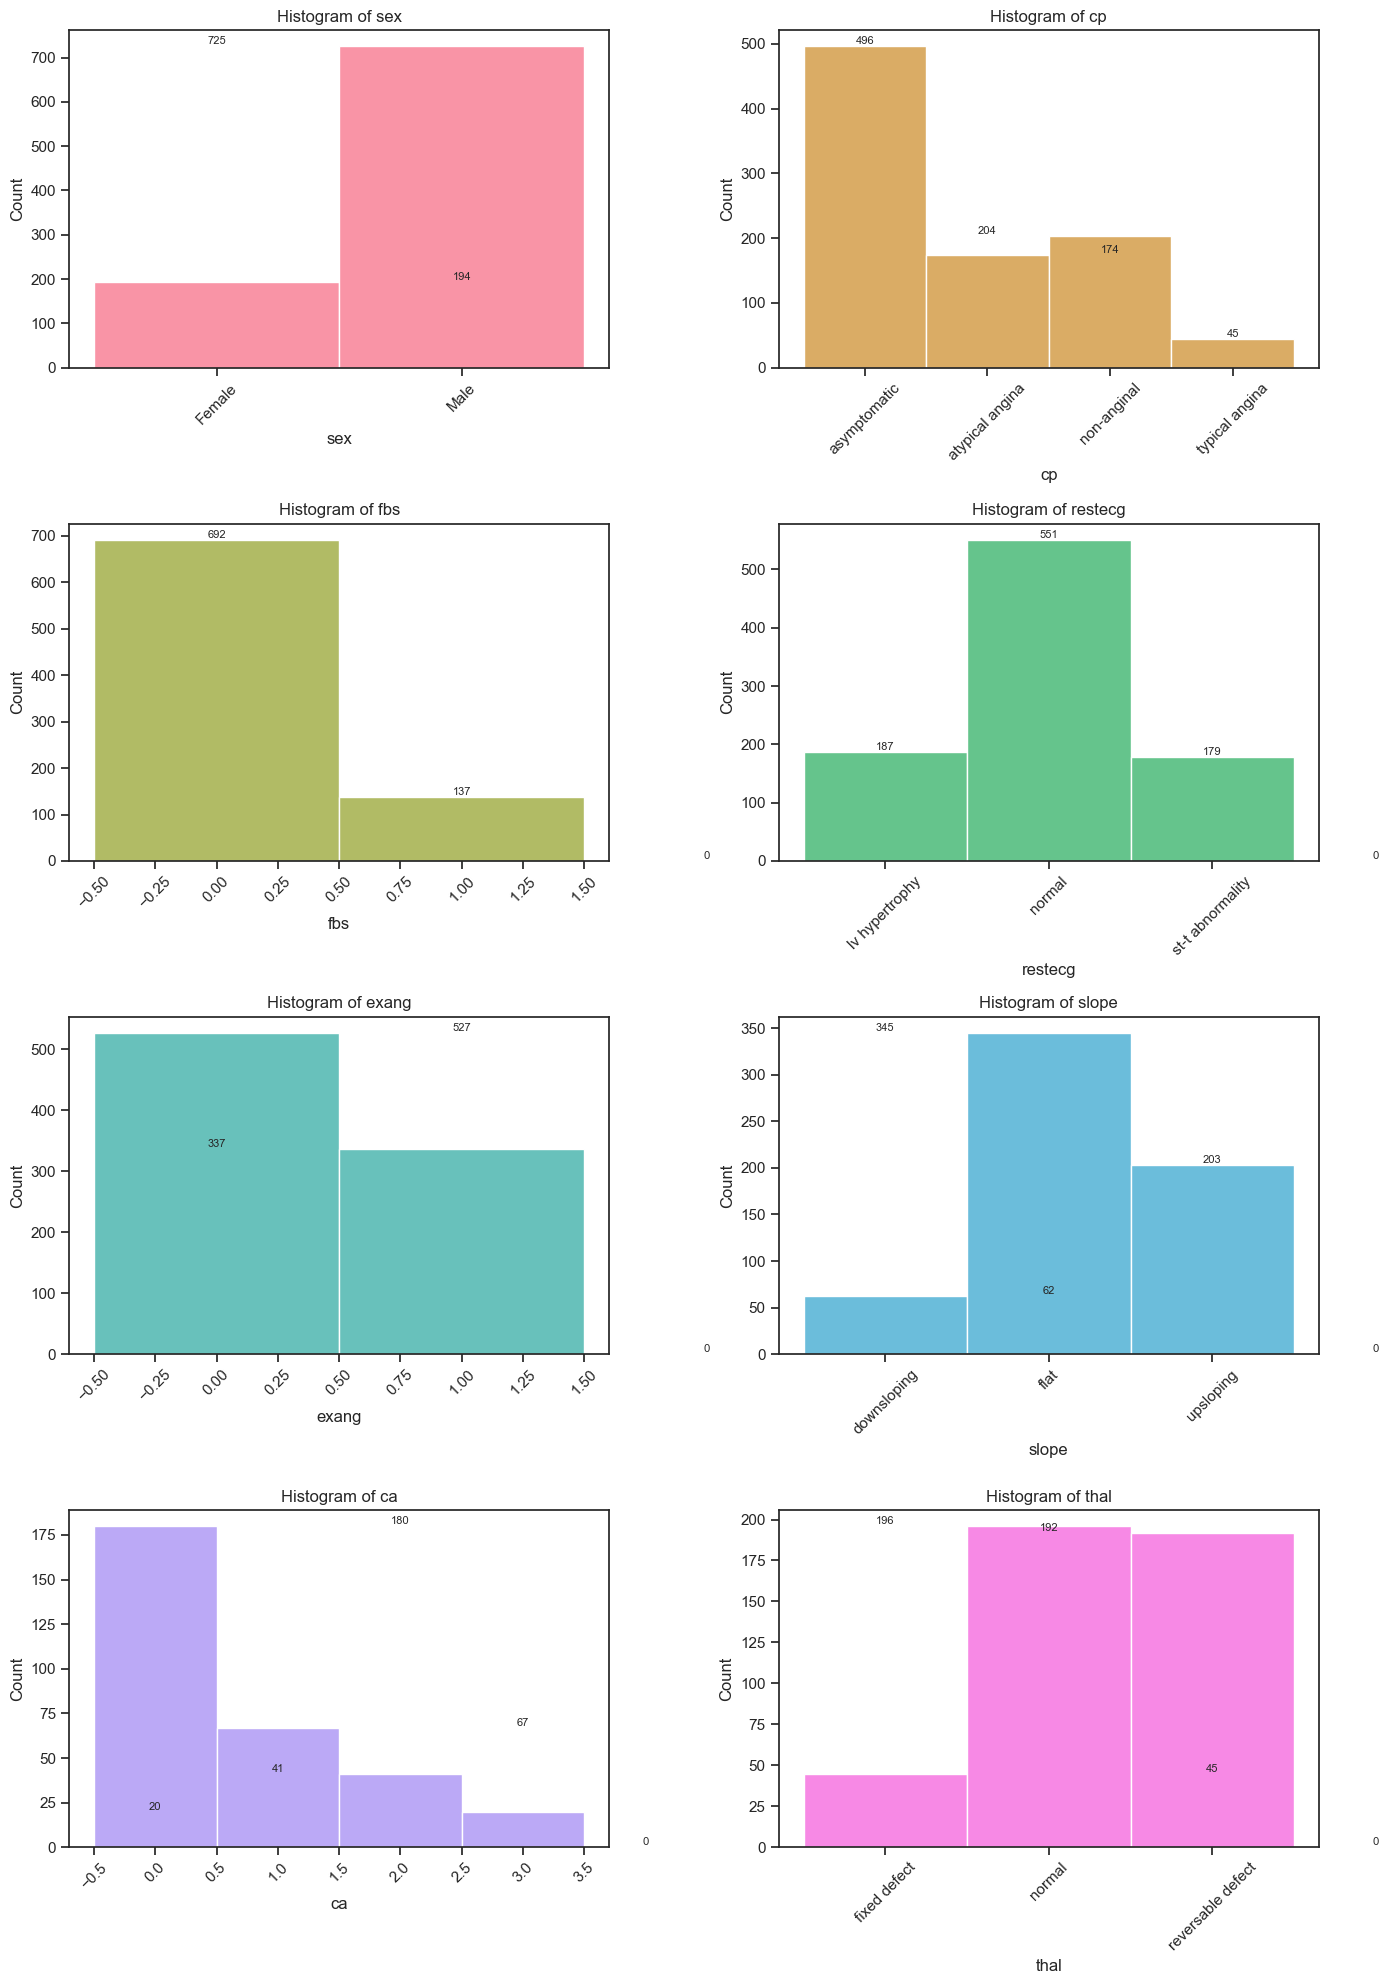

In [41]:
# Generate a list of unique colors
colors = sns.color_palette("husl", len(categorical_cols))

# Plot histograms for categorical columns with category labels on x-axis and frequency annotations
plt.figure(figsize=(14, 20))
num_categorical = len(categorical_cols)
for i, col in enumerate(categorical_cols):
    plt.subplot(num_categorical // 2 + num_categorical % 2, 2, i + 1)
    plot = sns.histplot(data[col], discrete=True, color=colors[i])
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    labels = data[col].unique()
    for j, label in enumerate(labels):
        count = (data[col] == label).sum()
        plt.text(j, count, f'{count}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()


#### 2. Box Plots for Numerical Columns

Box plots are valuable tools in data analysis for summarizing the distribution of numerical data, highlighting key statistics like median, quartiles, and outliers. They offer a clear and concise way to visualize and compare multiple variables within a dataset, aiding in exploratory data analysis and insights generation.

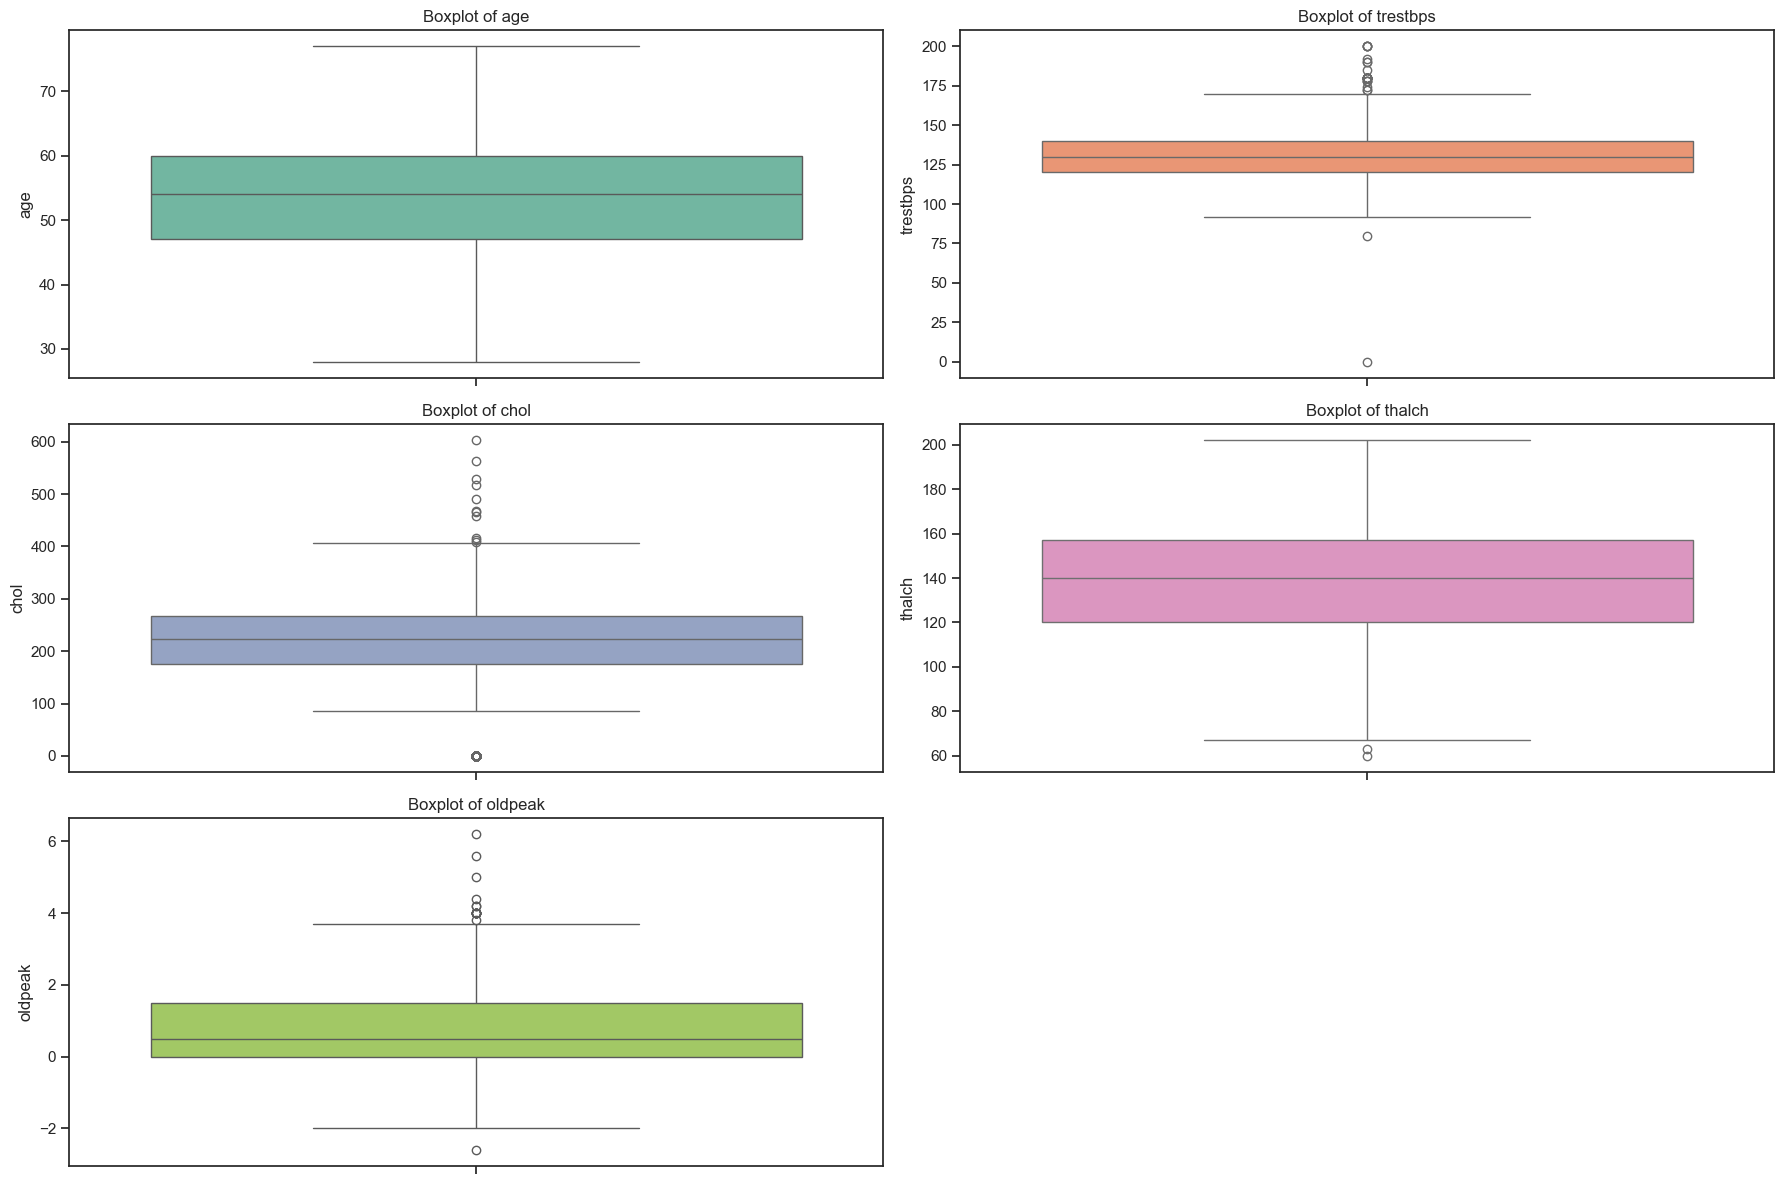

In [42]:
# Plot box plots for numeric columns with different colors
plt.figure(figsize=(18, 12))  # Larger figure size
colors = sns.color_palette('Set2')  # Generate a palette of colors
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2 + len(numeric_cols) % 2, 2, i + 1)
    sns.boxplot(y=data[col], color=colors[i % len(colors)])  # Use different color for each plot
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

 #### 3. Pair Plots for Numerical Columns

Pair plots, also known as scatter plot matrices, are a powerful visualization tool used to explore relationships between pairs of variables in a dataset. They provide a comprehensive view of pairwise relationships among multiple variables simultaneously.

* **Scatter Plots**
    <p>Each subplot in a pair plot displays the relationship between two variables. For instance, if you have variables x1, x2, ..., xn, the pair plot includes scatter plots like x1 vs x2, x1 vs x3, ..., x1 vs xn, and so forth.</p>

* **Diagonal Plots**
     <p>
     Along the diagonal of the pair plot matrix, you typically find histograms or density plots for each variable. These diagonal plots show the distribution of each variable in the dataset.</p>

* **Correlation**   
     <p>Pair plots are effective for identifying:</p>
    <div align=centering>

    | Analysis Technique       | Description                                                                                         |
    |--------------------------|-----------------------------------------------------------------------------------------------------|
    | Linear Relationships     | Determining if variables have a positive or negative linear relationship.                           |
    | Non-linear Relationships | Detecting curvilinear relationships that may not be apparent from summary statistics.               |
    | Clustering               | Identifying clusters or groups of data points that share similar characteristics across variables.   |
    | Outliers                 | Spotting outliers that stand out in scatter plots.                                                   |
    </div>

* **Data Distribution**
     <p>Diagonal plots in pair plots help assess the distribution and skewness of each variable, aiding in understanding the spread and central tendency of data points.</p>

* **Strength of Relationship**
     <p>Scatter plots in pair plots reveal the strength and direction of relationships between variables. Tight clustering around a line indicates a strong relationship, while random scattering suggests a weak or non-existent relationship.</p>

* **Multivariate Insights**
     <p>Pair plots facilitate multivariate exploration by visualizing relationships across multiple dimensions simultaneously. This is particularly valuable in datasets with numerous variables to understand interactions and dependencies comprehensively.</p>

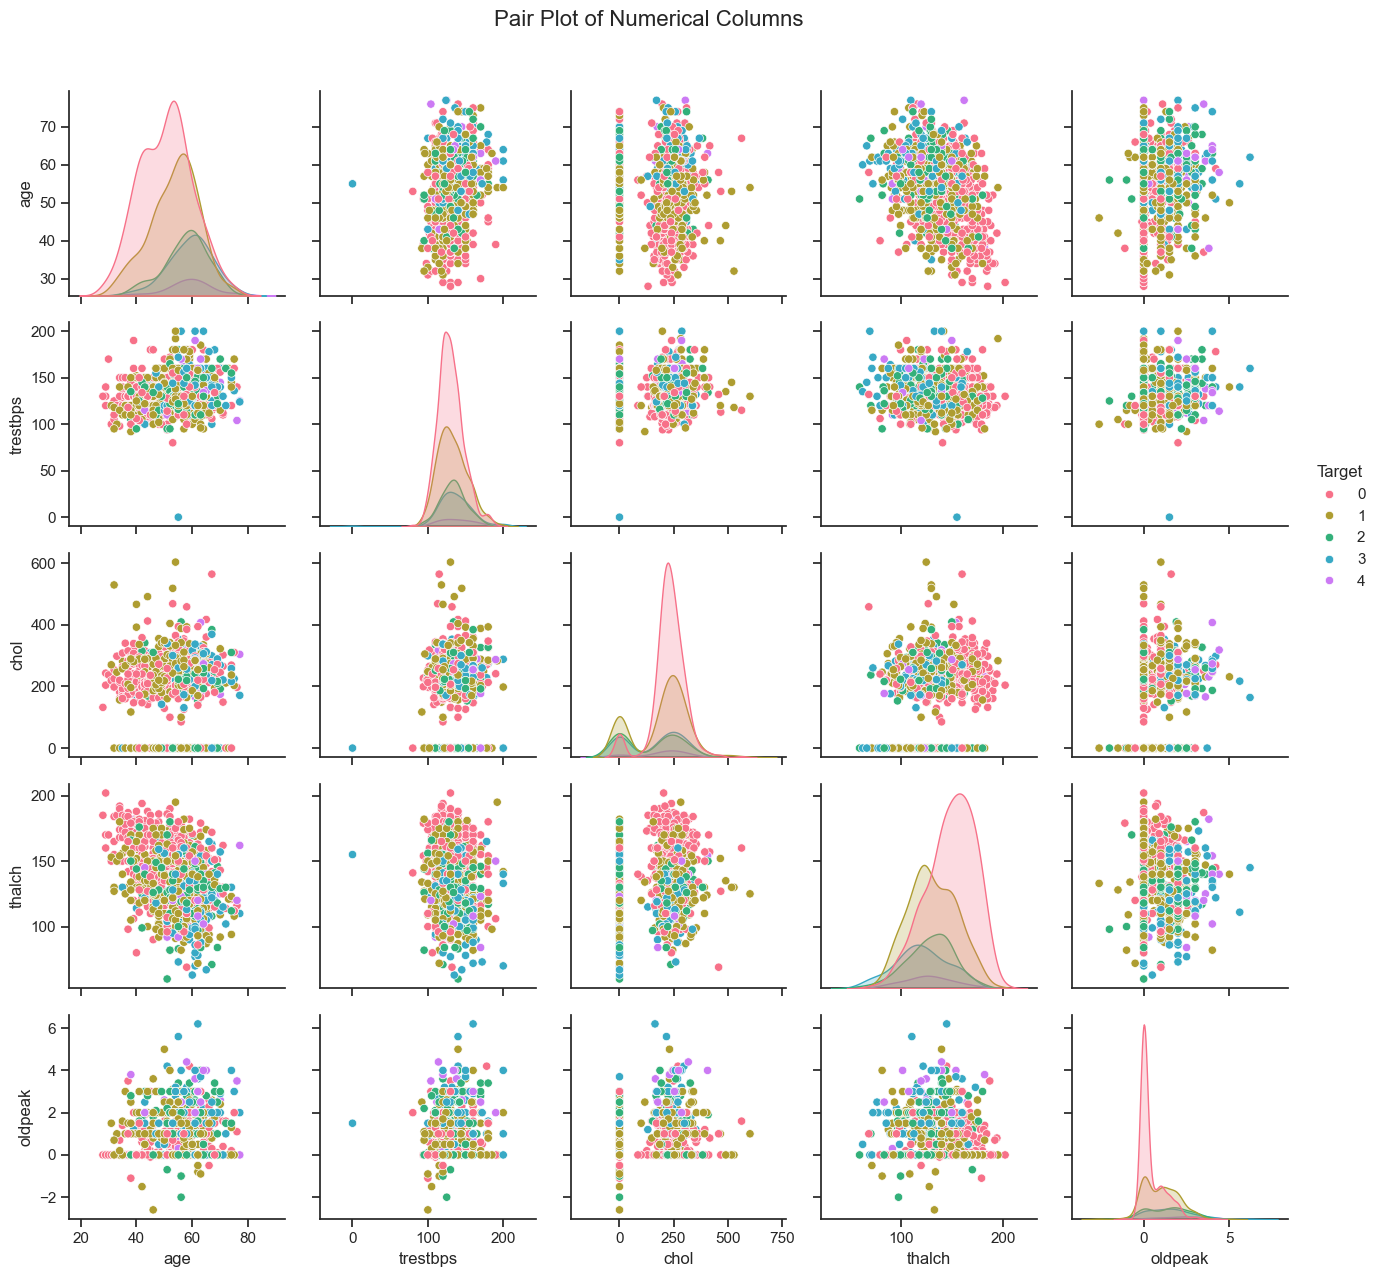

In [43]:
# Set the aesthetic style of the plots
sns.set(style="ticks")

# Create a pair plot for the numerical columns, color-coded by the 'target' column
pairplot = sns.pairplot(Data, vars=numerical_columns, hue='target', palette="husl", diag_kind='kde', markers=["o", "o", "o", "o", "o"])

# Add a legend and adjust its position
pairplot._legend.set_title("Target")
pairplot._legend.set_bbox_to_anchor((1.05, 0.6))

# Improve the layout and aesthetics
pairplot.fig.suptitle('Pair Plot of Numerical Columns', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Legend Explanation for the above plot
In the above plot,
<div align="center">

| Value | Description               |
|-------|---------------------------|
| 0     | No heart disease          |
| 1     | Mild heart disease        |
| 2     | Moderate heart disease    |
| 3     | Severe heart disease      |
| 4     | Critical heart disease    |
</div>

#### 4. Correlation Heat Map for Numerical Columns

A correlation heatmap is a visual representation of the correlation matrix, showing the pairwise correlations between different numerical features in your dataset.

* **Correlation Coefficient**

    The correlation coefficient is a statistical measure that calculates the strength and direction of the relationship between two variables. It ranges from -1 to 1:


<div align="center">

| Correlation Type                  | Description                                                                         |
|-----------------------------------|-------------------------------------------------------------------------------------|
| Perfect positive correlation (+1) | As one variable increases, the other variable increases proportionally.             |
| Perfect negative correlation (-1) | As one variable increases, the other variable decreases proportionally.             |
| No correlation (0)                | There is no linear relationship between the variables.                              |

</div>

* **What the Heatmap Shows**

    The heatmap provides a visual way to interpret the correlation matrix:

    - Color Coding: The colors represent the strength and direction of the correlations. Typically, a color scale is used (e.g., from blue to red), where,


    <div align="center">

    | Color Indicator                                  | Description                                          |
    |--------------------------------------------------|------------------------------------------------------|
    | Darker shades of one color (e.g., blue)          | Indicate strong negative correlations.               |
    | Darker shades of another color (e.g., red)       | Indicate strong positive correlations.               |
    | Lighter shades or neutral colors                 | Indicate weak or no correlation.                     |

    </div>
    

    - Values in Cells: Each cell in the heatmap contains a numerical value representing the correlation coefficient between two variables.


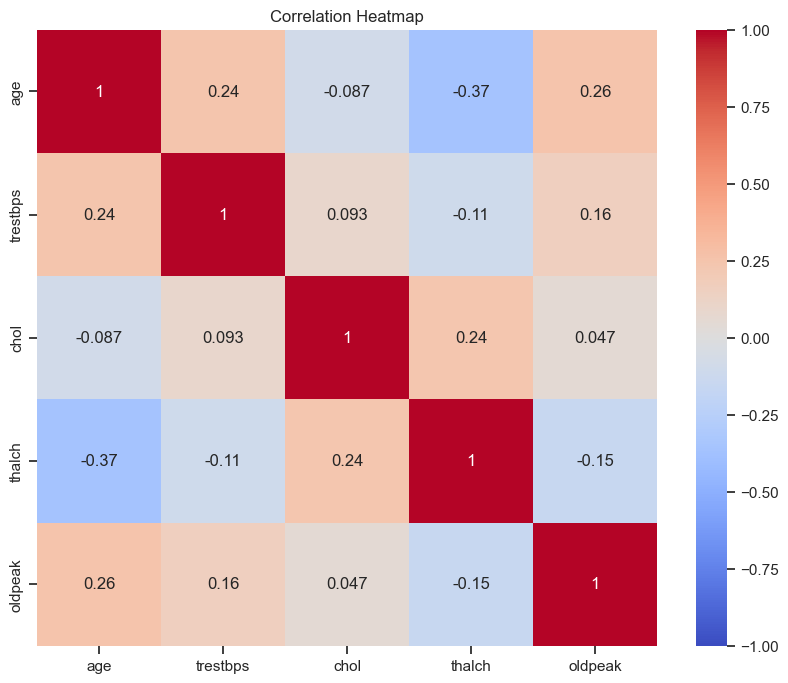

In [44]:
# Plot correlation heatmap for numeric columns

plt.figure(figsize=(10, 8))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

By looking at the heatmap, you can quickly identify:

-    **Strong Positive Correlations** 

        Variables that have high correlation coefficients close to +1. These variables ove together in the same direction.
-    **Strong Negative Correlations**

        Variables that have high correlation coefficients close to -1. These variables move in opposite directions.
-    **Weak or No Correlations**

        Variables that have correlation coefficients close to 0. There is no linear relationship between these variables.

# Handling of Missing Values

### Checking the number of missing values in each column

In [45]:
# Handling of missing values
# Over here we check the number of missing values that we have in each columns

missing_values = data.isnull().sum()
print(missing_values)

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


### Plotting the missing value data as a histogram

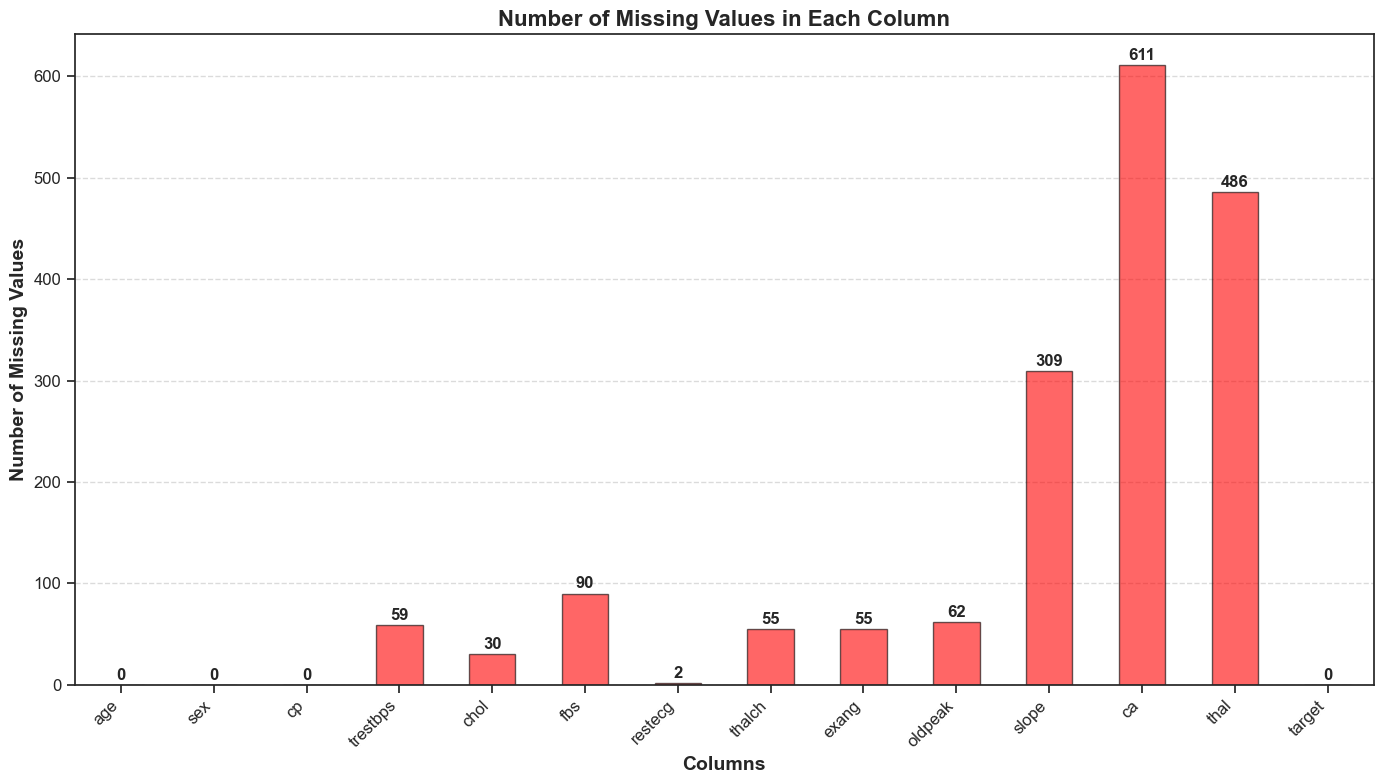

In [46]:
# We plot the missing values as a histogram

plt.figure(figsize=(14, 8))
missing_values.plot(kind='bar', color='red', edgecolor='black', alpha=0.6)
plt.title('Number of Missing Values in Each Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=14, fontweight='bold')
plt.ylabel('Number of Missing Values', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding value labels on top of the bars
for i, value in enumerate(missing_values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold')

plt.show()


### Seperating columns which have missing values

In [47]:
# Check for columns which have missing values

missing_data_cols = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()
print(f"Columns with missing values: \n{missing_data_cols}")

Columns with missing values: 
['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [48]:
# Loop through each column in the DataFrame

for column in data.columns:
    # Check if the column is categorical
    if data[column].dtype == 'object' or data[column].dtype == 'category':
        # Print the value counts of the column
        print(data[column].value_counts())
        print('-------------')

sex
Male      725
Female    194
Name: count, dtype: int64
-------------
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      45
Name: count, dtype: int64
-------------
fbs
False    692
True     137
Name: count, dtype: int64
-------------
restecg
normal              551
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64
-------------
exang
False    527
True     337
Name: count, dtype: int64
-------------
slope
flat           345
upsloping      203
downsloping     62
Name: count, dtype: int64
-------------
ca
0.0    180
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64
-------------
thal
normal               196
reversable defect    192
fixed defect          45
Name: count, dtype: int64
-------------
target
0    410
1    265
2    109
3    107
4     28
Name: count, dtype: int64
-------------


### Classification of Columns and data segregation

In [49]:
# Classifying Columns for better clarity

categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

data_null = data[data.isnull()]
data_not_null = data[data.notnull()]

### Defining Functions to fill Missing values in columns(Imputataion)

The imputation method used in the code employs a combination of Iterative Imputer and Random Forest models to handle missing data for both categorical and continuous variables effectively. 

1. **Iterative Imputer**

    The code utilizes the IterativeImputer from scikit-learn, which iteratively models each feature with missing values as a function of other features. This method estimates the missing values through multiple iterations until a convergence criterion is met. In this code, a RandomForestRegressor serves as the estimator for the imputer, enabling the model to capture complex, non-linear relationships between features, thereby enhancing the imputation's accuracy and reliability.

2. **Random Forest for Prediction**

    For categorical missing data, the code trains a RandomForestClassifier on the non-missing data to predict the missing values. Similarly, for continuous missing data, it trains a RandomForestRegressor on the non-missing data to predict and impute the missing values. This approach leverages the power of ensemble learning, where the random forest model, consisting of multiple decision trees, provides robust predictions by reducing overfitting and improving generalization.

In [50]:
# define the function to impute the missing values in thal column

import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore')

def encode_columns(df, bool_cols, label_encoder):
    """
    Encode categorical and boolean columns in a DataFrame.
    """
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            df[col] = label_encoder.fit_transform(df[col])
        elif col in bool_cols:
            df[col] = label_encoder.fit_transform(df[col].astype(str))
    return df

def impute_missing_columns(df, columns, iterative_imputer):
    """
    Impute missing values in the specified columns using iterative imputer.
    """
    for col in columns:
        if df[col].isnull().sum() > 0:
            df[col] = iterative_imputer.fit_transform(df[col].values.reshape(-1, 1))[:, 0]
    return df

def impute_categorical_missing_data(data, passed_col, bool_cols=[], missing_data_cols=[]):
    # Split data into null and not-null parts for the passed column
    data_null = data[data[passed_col].isnull()]
    data_not_null = data[data[passed_col].notnull()]

    # Separate features and target variable
    X = data_not_null.drop(passed_col, axis=1)
    y = data_not_null[passed_col]

    # Initialize label encoder and iterative imputer
    label_encoder = LabelEncoder()
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # Encode columns in X
    X = encode_columns(X, bool_cols, label_encoder)

    # Encode target column if it is boolean
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    # Impute other columns with missing values
    X = impute_missing_columns(X, missing_data_cols, iterative_imputer)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train RandomForest classifier
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = rf_classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"The feature '{passed_col}' has been imputed with {round((acc_score * 100), 2)}% accuracy\n")
    print("________________________________")

    # Prepare the null part of the data for prediction
    X_null = data_null.drop(passed_col, axis=1)
    X_null = encode_columns(X_null, bool_cols, label_encoder)
    X_null = impute_missing_columns(X_null, missing_data_cols, iterative_imputer)

    # Predict the missing values for the passed column
    if len(data_null) > 0:
        data_null[passed_col] = rf_classifier.predict(X_null)
        if passed_col in bool_cols:
            data_null[passed_col] = data_null[passed_col].map({0: False, 1: True})

    # Combine the imputed data
    data_combined = pd.concat([data_not_null, data_null])
    return data_combined[passed_col]



from sklearn.model_selection import train_test_split

def impute_continuous_missing_data(data, passed_col):
    data_null = data[data[passed_col].isnull()]
    data_not_null = data[data[passed_col].notnull()]

    X = data_not_null.drop(passed_col, axis=1)
    y = data_not_null[passed_col]
    
    other_missing_cols = [col for col in data.columns if col != passed_col and data[col].isnull().sum() > 0]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if col != 'trestbps' and (X[col].dtype == 'object' or X[col].dtype == 'category'):
            X[col] = label_encoder.fit_transform(X[col])
    
    if 'trestbps' in X.columns:
        X['trestbps'] = pd.to_numeric(X['trestbps'], errors='coerce')
    
    iterative_imputer = SimpleImputer(strategy='mean')  # Impute with mean value

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            if imputed_values.size > 0:  # Check if imputed_values is not empty
                X[col] = imputed_values[:, 0]
            else:
                print(f"No imputed values for column {col}")
        else:
            pass
    
    if len(data_not_null) < 2:
        print("Not enough non-null values to perform train-test split.")
        return data[passed_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if len(X_train) == 0 or len(X_test) == 0:
        print("Train or test set is empty.")
        return data[passed_col]

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE(Mean Ansolute Error) =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE(Root Mean Square Error) =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2(R - Squared) =", r2_score(y_test, y_pred), "\n")
    print("________________________________")

    X_null = data_null.drop(passed_col, axis=1)

    for col in X_null.columns:
        if col != 'trestbps' and (X_null[col].dtype == 'object' or X_null[col].dtype == 'category'):
            X_null[col] = label_encoder.fit_transform(X_null[col])

    if 'trestbps' in X_null.columns:
        X_null['trestbps'] = pd.to_numeric(X_null['trestbps'], errors='coerce')

    for col in other_missing_cols:
        if X_null[col].isnull().sum() > 0:
            col_with_missing_values = X_null[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            if imputed_values.size > 0:  # Check if imputed_values is not empty
                X_null[col] = imputed_values[:, 0]
            else:
                print(f"No imputed values for column {col}")
    else:
        pass
                
    if len(data_null) > 0: 
        X_null_imputed = iterative_imputer.fit_transform(X_null)
        if X_null_imputed.shape[1] < X_train.shape[1]:  # Check if number of features match
            X_null_imputed = np.hstack((X_null_imputed, np.zeros((X_null_imputed.shape[0], X_train.shape[1] - X_null_imputed.shape[1]))))
        data_null[passed_col] = rf_regressor.predict(X_null_imputed)
    else:
        pass

    data_combined = pd.concat([data_not_null, data_null])
    
    return data_combined[passed_col]
    


In [51]:
data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [52]:
print(missing_data_cols)

['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


### Imputing the Missing Values by calling the function

In [53]:
# impute missing values using our functions

for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((data[col].isnull().sum() / len(data)) * 100, 2))+"%")
    if col in categorical_cols:
        data[col] = impute_categorical_missing_data(data, col)
    elif col in numeric_cols:
        data[col] = impute_continuous_missing_data(data, col)
    else:
        pass

Missing Values trestbps : 6.42%


MAE(Mean Ansolute Error) = 13.403372093023256 

RMSE(Root Mean Square Error) = 17.190973023315813 

R2(R - Squared) = 0.06101402404519085 

________________________________
Missing Values chol : 3.26%
MAE(Mean Ansolute Error) = 56.72455056179776 

RMSE(Root Mean Square Error) = 80.74859634568116 

R2(R - Squared) = 0.4152477581817188 

________________________________
Missing Values fbs : 9.79%
The feature 'fbs' has been imputed with 83.73% accuracy

________________________________
Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 60.33% accuracy

________________________________
Missing Values thalch : 5.98%
MAE(Mean Ansolute Error) = 16.632369942196533 

RMSE(Root Mean Square Error) = 21.870794578417343 

R2(R - Squared) = 0.28681072425138476 

________________________________
Missing Values exang : 5.98%
The feature 'exang' has been imputed with 73.41% accuracy

________________________________
Missing Values oldpeak : 6.75%
MAE(Mean Ansolute Error) = 0.571

### Checking if the values have been imputed now or not

In [54]:
# Checking the columns with Num Values now
# We see that the missing values have been imputed

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
print(data['target'])

0      2
1      1
2      0
3      0
4      0
      ..
914    1
915    0
916    2
917    0
918    1
Name: target, Length: 919, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]


### Re-writing the Target column or the num column values
The values in the Target(or num) column take the following values.
<div align="center">

| Value | Description               |
|-------|---------------------------|
| 0     | No heart disease          |
| 1     | Mild heart disease        |
| 2     | Moderate heart disease    |
| 3     | Severe heart disease      |
| 4     | Critical heart disease    |

</div>

As mentioned before,

We will convert the values 1,2,3,4 to 1 itself and 0 remains as 0. So now we only have two categories 0 or 1. Where,
<div align="center">

| Value | Description          |
|-------|----------------------|
|0      |No heart disease      |
|1      |Heart disease         |

</div>

This is done because any stage of heart disease is harmful and should be dispayed as same.

In [56]:
# Ensure the target column is numeric
data['target'] = pd.to_numeric(data['target'], errors='coerce')

# Convert the target column to binary
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
print(data['target'])

0      1
1      1
2      0
3      0
4      0
      ..
914    1
915    0
916    1
917    0
918    1
Name: target, Length: 919, dtype: int64


In [57]:
print(data.dtypes)

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs           object
restecg       object
thalch       float64
exang         object
oldpeak      float64
slope         object
ca           float64
thal          object
target         int64
dtype: object


# Running Logistic Regression Model 

In [58]:
# Define your categorical and numeric columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols = [col for col in data.columns if col not in categorical_cols and col != 'target']  # Assuming 'target' is your label column

# Encode categorical columns
label_encoders = {}    # This is a dictionary
for col in categorical_cols:
    le = LabelEncoder() # object of LabelEncoder class
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Generate polynomial and interaction features
# Generate a new feature matrix consisting of all polynomial,
# combinations of the features with degree less than or equal to the specified degree.
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the new dataset
# 30% of data set for testing pourposes and 70% of the dataset for training
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)


# Normalize numeric columns
# This is basically feature scaling to resize values between 0 and 1 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the logistic regression model with Grid Search for hyperparameter tuning
# grid of hyperparameters that will be used for tuning a machine learning model
# This is a dictionary
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Initialize the grid search
# performs hyperparameter optimization through an exhaustive search over a specified grid of hyperparameters.
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=10000), param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
# it tries every combination of hyperparameters and finds the best set for this data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.2f}')
print(f'Best Estimator: {best_estimator}')

# Train the final model with best parameters
logreg = LogisticRegression(random_state=42, max_iter=10000, **best_params)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate the model
# We compute the accuracy with the test variable y and the prediction variable y
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'class_weight': None, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.85
Best Estimator: LogisticRegression(C=1, max_iter=10000, random_state=42, solver='liblinear')
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       112
           1       0.91      0.82      0.87       164

    accuracy                           0.85       276
   macro avg       0.84      0.85      0.85       276
weighted avg       0.86      0.85      0.85       276



### We print the encoded values to see what numeric value is assigned to each variable

In [59]:
# Function to display encoded values
for col, le in label_encoders.items():
    print(f"Column: {col}")
    for class_value in le.classes_:
        encoded_value = le.transform([class_value])[0]
        print(f"  {class_value}: {encoded_value}")
    print()

Column: sex
  Female: 0
  Male: 1

Column: cp
  asymptomatic: 0
  atypical angina: 1
  non-anginal: 2
  typical angina: 3

Column: fbs
  False: 0
  True: 1

Column: restecg
  lv hypertrophy: 0
  normal: 1
  st-t abnormality: 2

Column: exang
  False: 0
  True: 1

Column: slope
  downsloping: 0
  flat: 1
  upsloping: 2

Column: thal
  fixed defect: 0
  normal: 1
  reversable defect: 2



# Running Random Forest Model

In [60]:
def train_random_forest(data, target, categorical_cols, numeric_cols):
    # Split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # Create a new LabelEncoder for each categorical column
    for col in categorical_cols:
        if col in X.columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le

    # Split the dataset
    # 30% of data set for testing pourposes and 70% of the dataset for training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Scaling Data
    # Normalize numeric columns
    # This is basically feature scaling to resize values between 0 and 1 
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0, class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150], # n_estimators: More trees can increase accuracy but also increase computation time.
        'max_depth': [None, 10, 20], # max_depth: Limiting tree depth can prevent overfitting.
        'min_samples_split': [2, 5, 10], # min_samples_split: Ensures nodes have a minimum number of samples before splitting, preventing overly specific splits.
        'min_samples_leaf': [1, 2, 4] # Ensures leaf nodes have a minimum number of samples, which helps smooth the model and reduce overfitting.
    }

    # Perform GridSearchCV for hyperparameter tuning
    # performs hyperparameter optimization through an exhaustive search over a specified grid of hyperparameters
    # it tries every combination of hyperparameters and finds the best set for this data
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_params = grid_search.best_params_
    best_rf_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Print the best hyperparameters, Score, Estimator
    print(f'Best Hyperparameters: \n{best_params}')
    print(f'\nBest Score: {best_score}')
    print(f'\nBest Estimator: {best_estimator}')

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)
    y_pred = best_rf_model.predict(X_test)

    # Accuracy Calculation
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\nAccuracy on Test Set: {accuracy:.2f}')

    # Return the best model, parameters, and accuracy without inverse transforming the entire data
    return best_rf_model, best_params, accuracy

best_model, best_params, test_accuracy = train_random_forest(data, 'target', categorical_cols, numeric_cols)


Best Hyperparameters: 
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best Score: 0.8739946705426356

Best Estimator: LogisticRegression(C=1, max_iter=10000, random_state=42, solver='liblinear')

Accuracy on Test Set: 0.85


# Running XGBoost Model

In [61]:
def train_xgb_classifier(data, target, categorical_cols, numeric_cols):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # Split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # Encode X data using separate label encoder for all categorical columns and save it for inverse transform
    for col in categorical_cols:
        if col in X.columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le

    # Ensure y is encoded as integers
    label_encoder_y = LabelEncoder()
    y = label_encoder_y.fit_transform(y)

    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Scaling Data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\nAccuracy on Test Set: {accuracy:.2f}')

    return best_xgb_model, best_params
# Example usage
best_model, best_params = train_xgb_classifier(data, 'target', categorical_cols, numeric_cols)

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

Accuracy on Test Set: 0.87
